# ***Pretrain Model***

In [1]:
from tensorflow.keras.applications import EfficientNetV2L

In [2]:
model = EfficientNetV2L(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

473176280/473176280 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


In [ ]:
model.summary()

# ***Fine Tuning***

In [55]:
# Unfreeze last 20 layers
for layer in model.layers[-20:]:
    layer.trainable = True

In [56]:
for layer in model.layers:
  print(layer.name,layer.trainable)

input_layer False
rescaling False
stem_conv False
stem_bn False
stem_activation False
block1a_project_conv False
block1a_project_bn False
block1a_project_activation False
block1a_add False
block1b_project_conv False
block1b_project_bn False
block1b_project_activation False
block1b_drop False
block1b_add False
block1c_project_conv False
block1c_project_bn False
block1c_project_activation False
block1c_drop False
block1c_add False
block1d_project_conv False
block1d_project_bn False
block1d_project_activation False
block1d_drop False
block1d_add False
block2a_expand_conv False
block2a_expand_bn False
block2a_expand_activation False
block2a_project_conv False
block2a_project_bn False
block2b_expand_conv False
block2b_expand_bn False
block2b_expand_activation False
block2b_project_conv False
block2b_project_bn False
block2b_drop False
block2b_add False
block2c_expand_conv False
block2c_expand_bn False
block2c_expand_activation False
block2c_project_conv False
block2c_project_bn False
block2

# ***My Model***

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

In [7]:
my_model = Sequential(
    [
        model,
        GlobalAveragePooling2D(),
        Dense(512,activation='relu'),
        Dropout(0.2),
        Dense(512,activation='relu'),
        Dropout(0.2),
        Dense(1,activation='sigmoid')
    ]
)

my_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetv2-l (Functional)   │ (None, 7, 7, 1280)     │   117,746,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,665,889 (452.67 MB)

 Trainable params: 919,041 (3.51 MB)

 Non-trainable params: 117,746,848 (449.17 MB)

# ***Datasets***

In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [57]:
!kaggle datasets download -d tongpython/cat-and-dog
!unzip cat-and-dog.zip -d ./data

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
cat-and-dog.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  cat-and-dog.zip
replace ./data/test_set/test_set/cats/_DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [10]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cat-and-dog.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

# ***Setting Up The Dataset***

In [11]:
import tensorflow as tf

# generators

batch_size = 4
seed = 1

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/training_set/training_set',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(224,224),
    shuffle=True,
    validation_split=0.2,
    subset ="training",
    seed=seed)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/test_set/test_set',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(224,224),
    shuffle=True,
    validation_split=0.2,
    subset ="validation",
    seed=seed)


Found 8005 files belonging to 2 classes.
Using 6404 files for training.
Found 2023 files belonging to 2 classes.
Using 404 files for validation.


# ***Shape***

In [12]:
iterative = iter(train_ds)
next(iterative)[0][0].numpy().shape

(224, 224, 3)

# ***Visulization***

In [13]:
import matplotlib.pyplot as plt
import numpy as np

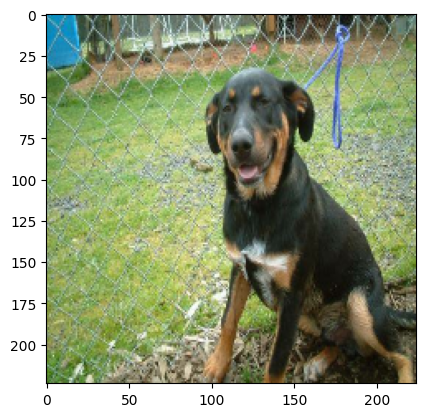

In [14]:
plt.imshow(next(iterative)[0][0].numpy().astype(np.int32))

# ***data argumentation***

In [15]:
from tensorflow.image import random_flip_left_right, random_flip_up_down , adjust_brightness , adjust_contrast

In [16]:
def augment(image,label):
  image = random_flip_left_right(image)
  image = random_flip_up_down(image)
  image = adjust_brightness(image,0.2)
  return image,label

train_ds = train_ds.map(augment,num_parallel_calls=tf.data.AUTOTUNE)

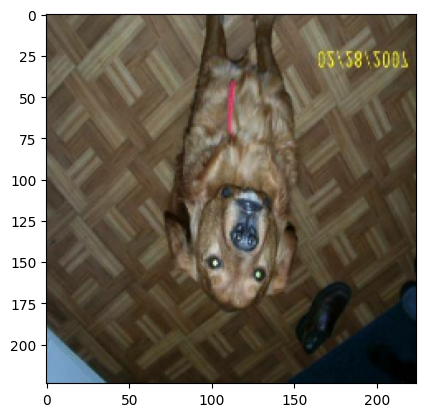

In [17]:
itera = iter(train_ds)
plt.imshow(next(itera)[0][0].numpy().astype(np.int32))

# ***Testing***

In [18]:
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.prefetch(tf.data.AUTOTUNE)

# ***Evalution***

In [58]:
from tensorflow.keras.metrics import *
metrics = ["accuracy",Precision(),Recall(),AUC()]

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy


my_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss="binary_crossentropy",
    metrics=metrics
)

# ***To Avoiod OverFitting***

In [59]:
from tensorflow.keras.callbacks import EarlyStopping

callbacks = EarlyStopping(monitor='val_loss',patience=3)

# ***My Model Training***

In [60]:
my_model.fit(train_ds,epochs=10,validation_data=test_ds,callbacks=callbacks)

Epoch 1/10
1601/1601 ━━━━━━━━━━━━━━━━━━━━ 231s 86ms/step - accuracy: 0.9401 - auc_1: 0.9860 - loss: 0.1609 - precision_1: 0.9160 - recall_1: 0.9702 - val_accuracy: 0.9926 - val_auc_1: 0.9997 - val_loss: 0.0254 - val_precision_1: 0.9907 - val_recall_1: 0.9953
Epoch 2/10
1601/1601 ━━━━━━━━━━━━━━━━━━━━ 123s 77ms/step - accuracy: 0.9642 - auc_1: 0.9946 - loss: 0.0897 - precision_1: 0.9636 - recall_1: 0.9639 - val_accuracy: 0.9950 - val_auc_1: 0.9995 - val_loss: 0.0230 - val_precision_1: 0.9907 - val_recall_1: 1.0000
Epoch 3/10
1601/1601 ━━━━━━━━━━━━━━━━━━━━ 144s 78ms/step - accuracy: 0.9701 - auc_1: 0.9950 - loss: 0.0789 - precision_1: 0.9661 - recall_1: 0.9747 - val_accuracy: 0.9950 - val_auc_1: 0.9998 - val_loss: 0.0170 - val_precision_1: 0.9907 - val_recall_1: 1.0000
Epoch 4/10
1601/1601 ━━━━━━━━━━━━━━━━━━━━ 137s 75ms/step - accuracy: 0.9803 - auc_1: 0.9975 - loss: 0.0588 - precision_1: 0.9799 - recall_1: 0.9809 - val_accuracy: 0.9950 - val_auc_1: 0.9997 - val_loss: 0.0217 - val_precisi

In [61]:
results = my_model.evaluate(test_ds, return_dict=False)
print(results)  # This will be a list of values

101/101 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.9954 - auc_1: 0.9998 - loss: 0.0216 - precision_1: 0.9913 - recall_1: 1.0000
[0.02359517477452755, 0.9950494766235352, 0.9907407164573669, 1.0, 0.9997785091400146]


# ***Test Prediction***

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


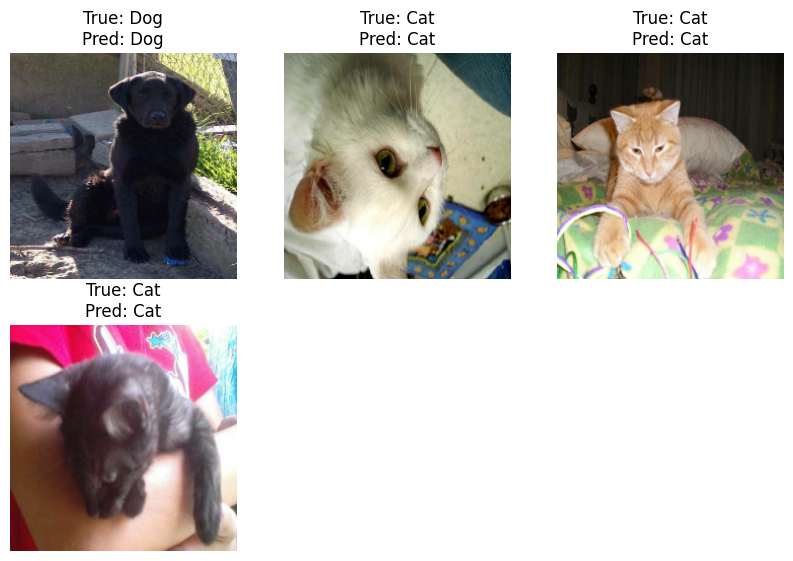

In [69]:
# Take one batch from the test dataset
images, labels = next(iter(train_ds))

# Run predictions on this batch
predictions = my_model.predict(images)
pred_classes = (predictions > 0.5).astype("int32")

# Show some predictions
batch_size = images.shape[0]   # number of images in this batch
plt.figure(figsize=(10, 10))
for i in range(min(batch_size, 9)):  # show up to 9 images
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    true_label = "Dog" if labels[i].numpy() == 1 else "Cat"
    pred_label = "Dog" if pred_classes[i] == 1 else "Cat"
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis("off")

plt.show()


# ***Raw Data***

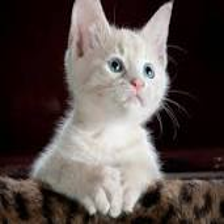

In [70]:
from PIL import Image

image = Image.open("/content/download.jpeg")
image = image.resize((224,224))
image

In [76]:
import numpy as np

# Convert to numpy array
img = np.asarray(image).astype("float32")

# Add batch dimension -> (1,224,224,3)
img = np.expand_dims(img, axis=0)

# Predict
pred = my_model.predict(img)

print("Raw Prediction:", pred)

# If binary classification (Dogs vs Cats)
if pred[0][0] > 0.5:
    print("Predicted: Dog")
else:
    print("Predicted: Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Raw Prediction: [[1.9828563e-05]]
Predicted: Cat


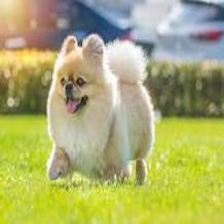

In [80]:
from PIL import Image

image_2 = Image.open("/content/download (1).jpeg")
image_2 = image_2.resize((224,224))
image_2

In [81]:
import numpy as np

# Convert to numpy array
img_2 = np.asarray(image_2).astype("float32")

# Add batch dimension -> (1,224,224,3)
img_2 = np.expand_dims(img_2, axis=0)

# Predict
pred_2 = my_model.predict(img_2)

print("Raw Prediction:", pred_2)

# If binary classification (Dogs vs Cats)
if pred_2[0][0] > 0.5:
    print("Predicted: Dog")
else:
    print("Predicted: Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Raw Prediction: [[0.9999076]]
Predicted: Dog


# ***Model Saving***

In [85]:
from tensorflow.keras.models import load_model

# Save in new format
my_model.save("cat_vs_dog_model.keras")